In [1]:
import os
import pyart
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import xarray as xr
from datetime import datetime, timedelta

from metpy import plots, calc
from metpy.units import units
import profile_io as io

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

mpl.rcParams['xtick.labelsize'] = 6


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [71]:
def scale_bar(ax, length=None, location=(0.8, 0.05), linewidth=3):
    """
    ax is the axes to draw the scalebar on.
    length is the length of the scalebar in km.
    location is center of the scalebar in axis coordinates.
    (ie. 0.5 is the middle of the plot)
    linewidth is the thickness of the scalebar.
    """
    #Get the limits of the axis in lat long
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    #Make tmc horizontally centred on the middle of the map,
    #vertically at scale bar location
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]
    tmc = ccrs.TransverseMercator(sbllx, sblly)
    #Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(tmc)
    #Turn the specified scalebar location into coordinates in metres
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    #Calculate a scale bar length if none has been given
    #(Theres probably a more pythonic way of rounding the number but this works)
    if not length: 
        length = (x1 - x0) / 5000 #in km
        ndim = int(np.floor(np.log10(length))) #number of digits in number
        length = round(length, -ndim) #round to 1sf
        #Returns numbers starting with the list
        def scale_number(x):
            if str(x)[0] in ['1', '2', '5']: return int(x)        
            else: return scale_number(x - 10 ** ndim)
        length = scale_number(length) 

    #Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbx - length * 500, sbx + length * 500]
    #Plot the scalebar
    ax.plot(bar_xs, [sby, sby], transform=tmc, color='k', linewidth=linewidth)
    #Plot the scalebar label
    ax.text(sbx, sby+10, str(length) + ' km', transform=tmc,
            horizontalalignment='center', verticalalignment='bottom', size=15, weight='bold')

In [61]:
# for each 100 second interval, plot the trajectory of the hailsonde ontop of a 4 panel figure of the nearest xsection in space and time.

output_folder = '/g/data/kl02/jss548/hail-research/hailsonde/nhp_output'
radar_ffn = '/g/data/kl02/jss548/hail-research/hailsonde/20230724_CASCV_subset/2023072422_36_ODIMH5_PVOL6S_VOL_CASCV.h5'
radar = pyart.aux_io.read_odim_h5(radar_ffn, file_field_names=True)
#sweep 16 is the lowest (0.4deg)
sweep_idx = 16
start_dt = datetime.strptime(radar.time['units'][14:], '%Y-%m-%dT%H:%M:%SZ')
sweep_start_dt = start_dt + timedelta(seconds = radar.time['data'][radar.sweep_start_ray_index['data'][sweep_idx]].astype(float))
sweep_end_dt = start_dt + timedelta(seconds = radar.time['data'][radar.sweep_end_ray_index['data'][sweep_idx]].astype(float))
print(sweep_start_dt, sweep_end_dt)
#launch time is 22:35, so this is perfect!

min_lon=-116.35
max_lon=-115.85
min_lat=53.3
max_lat=53.80

profile_launch_lon = -116.080467
profile_launch_lat = 53.395135

2023-07-24 22:35:06 2023-07-24 22:35:38


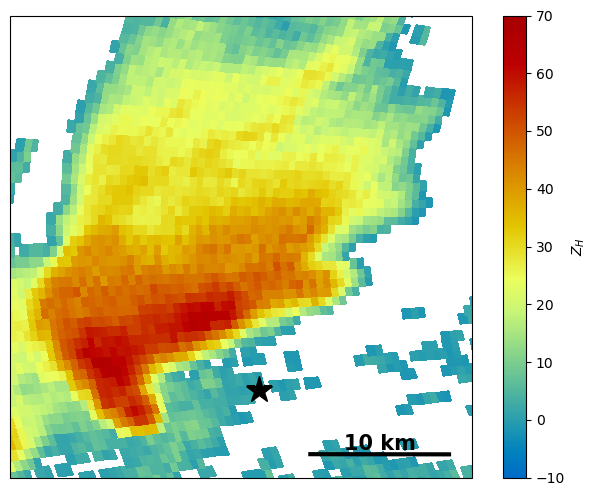

In [72]:
fig = plt.figure(figsize=(8, 6))
display = pyart.graph.RadarMapDisplay(radar)
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
display.plot_ppi_map('DBZH', 
                        sweep=sweep_idx, ax=ax, vmin=-10, vmax=70,
                        colorbar_label='$Z_{H}$', title_flag=False,
                        lon_lines=[],
                        lat_lines=[],
                        min_lon=min_lon,
                        max_lon=max_lon,
                        min_lat=min_lat,
                        max_lat=max_lat)
display.plot_point(profile_launch_lon, profile_launch_lat, symbol='k*', ms=20)
scale_bar(ax, 10)

2023-07-24 22:41:06 2023-07-24 22:41:38


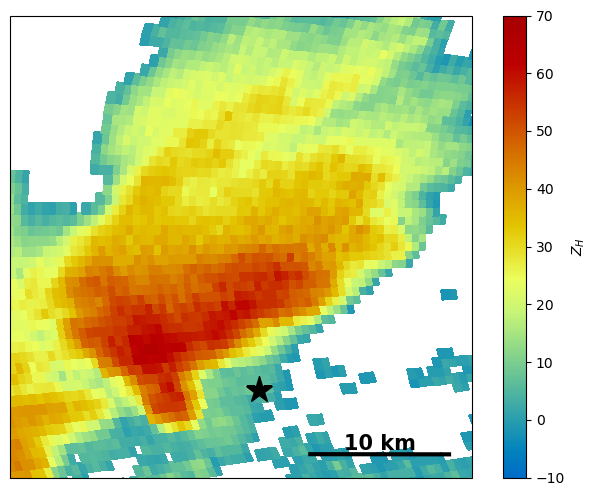

In [73]:
# for each 100 second interval, plot the trajectory of the hailsonde ontop of a 4 panel figure of the nearest xsection in space and time.

output_folder = '/g/data/kl02/jss548/hail-research/hailsonde/nhp_output'
radar_ffn = '/g/data/kl02/jss548/hail-research/hailsonde/20230724_CASCV_subset/2023072422_42_ODIMH5_PVOL6S_VOL_CASCV.h5'
radar = pyart.aux_io.read_odim_h5(radar_ffn, file_field_names=True)
#sweep 16 is the lowest (0.4deg)
sweep_idx = 16
start_dt = datetime.strptime(radar.time['units'][14:], '%Y-%m-%dT%H:%M:%SZ')
sweep_start_dt = start_dt + timedelta(seconds = radar.time['data'][radar.sweep_start_ray_index['data'][sweep_idx]].astype(float))
sweep_end_dt = start_dt + timedelta(seconds = radar.time['data'][radar.sweep_end_ray_index['data'][sweep_idx]].astype(float))
print(sweep_start_dt, sweep_end_dt)
#launch time is 22:35, so this is perfect!

min_lon=-116.35
max_lon=-115.85
min_lat=53.3
max_lat=53.80

profile_launch_lon = -116.080467
profile_launch_lat = 53.395135

fig = plt.figure(figsize=(8, 6))
display = pyart.graph.RadarMapDisplay(radar)
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
display.plot_ppi_map('DBZH', 
                        sweep=sweep_idx, ax=ax, vmin=-10, vmax=70,
                        colorbar_label='$Z_{H}$', title_flag=False,
                        lon_lines=[],
                        lat_lines=[],
                        min_lon=min_lon,
                        max_lon=max_lon,
                        min_lat=min_lat,
                        max_lat=max_lat)
display.plot_point(profile_launch_lon, profile_launch_lat, symbol='k*', ms=20)
scale_bar(ax, 10)